# Test L96_one implementation
This notebook runs a short sanity test of `L96_one!` from `Lorenz.jl`.
Kernel: use a Julia kernel before running the code cells.

In [46]:
# Load dependencies and the implementation
using Pkg
Pkg.activate("")
# Ensure DifferentialEquations is available; uncomment to install if needed
# Pkg.add("DifferentialEquations")
using DifferentialEquations
# Include the project's Lorenz/L96 implementation (assumes notebook is in project root)
include("Lorenz.jl")


  Activating project at `~/Documents/Projects/UF_UKI/uf-uki`


batch_lorenz_96_model_part_2 (generic function with 1 method)

In [10]:

# Small test: run L96_one! with a short integration and print final state
K = 8
b0 = 0.0; b1 = 0.0; b2 = 0.0; b3 = 0.0; b4 = 0.0
p = [K, b0, b1, b2, b3, b4]
u0 = randn(K)
tspan = (0.0, 1.0)
prob = ODEProblem(L96_one!, u0, tspan, p)
sol = solve(prob, Tsit5(), saveat=0.1)
println("Ran L96_one! for K=", K, "; time steps=", length(sol.u))
println("Final state:")
display(sol.u[end])

Ran L96_one! for K=8; time steps=11
Final state:
; time steps=11
Final state:


8-element Vector{Float64}:
  0.552179858129639
 -0.6868776289069333
  0.09117891710284991
  0.5231847665074135
  0.10247072744091833
  0.24886071390276143
 -0.24587379750829175
  0.010306012829620627

In [21]:
# Create a L96_one_params object
K = 36
timestep = .1
t_end = 1000
tspan = (0.0, t_end)
toss = 0
noise = 0
b0 = 18 - .275; b1 = -1.59; b2 = 0.019; b3 = 0.013; b4 = -0.000707
uki_thetas = [K, b0, b1, b2, b3, b4]
l96_one_params = L96_one_params(K=K, timestep=timestep, t_end=t_end, toss=toss, noise=noise, uki_thetas=uki_thetas)

L96_one_params(36, [0.728570244483941, 0.21401954629565312, -0.6764929393860819, 0.4608197680147081, -0.13767771902034398, -0.01947032715940912, 0.6693704169160797, 0.2380530149274539, 0.7185158274304668, -1.2018738262873836  …  -0.577847872769285, 1.5489755696440026, -2.016821541752892, 0.13269800217482833, 0.2632822932693939, 0.21573562125600812, -0.5538537677859028, -0.1198161395323353, -0.283827889265434, 2.3736950202783245], 0.001, 0.1, 1000, 0, 0, nothing, nothing, [36.0, 17.725, -1.59, 0.019, 0.013, -0.000707], Main.L96_trans_C2_to_L96)

In [22]:
abstol=1e-6; reltol=1e-3
prob1 = ODEProblem(L96_one!, l96_one_params.u0, tspan, uki_thetas)
sol = solve(prob1, AutoTsit5(Rosenbrock23()), saveat = l96_one_params.timestep, abstol=abstol, reltol=reltol, maxiters=1e7)
tossed = sol.u[round(Int, l96_one_params.toss/l96_one_params.timestep)+1:end]

10001-element Vector{Vector{Float64}}:
 [0.728570244483941, 0.21401954629565312, -0.6764929393860819, 0.4608197680147081, -0.13767771902034398, -0.01947032715940912, 0.6693704169160797, 0.2380530149274539, 0.7185158274304668, -1.2018738262873836  …  -0.577847872769285, 1.5489755696440026, -2.016821541752892, 0.13269800217482833, 0.2632822932693939, 0.21573562125600812, -0.5538537677859028, -0.1198161395323353, -0.283827889265434, 2.3736950202783245]
 [2.181755829190932, 1.3697883666218438, 1.0192414211351573, 1.926844083758632, 1.5216361561942713, 1.56160053243754, 2.1097696307803795, 1.8197623663477, 1.965265538579392, 0.5730746743341576  …  1.354898534662856, 2.6972358191944448, 0.11509196724456518, 1.7561720025913419, 1.9321706411813067, 1.66256416001733, 1.0979183887928208, 1.4647382358485375, 1.5093015957959732, 3.4779934016301515]
 [3.0532602978195214, 2.0960435201866754, 2.3440970001216535, 3.156522134505925, 2.8719426734149587, 2.8182416416830836, 3.2685047188464886, 3.03255210

In [23]:
# Test L96_one_moments

y = L96_one_moments(tossed, noise, l96_params)
println("L96_one_moments output size: ", size(y))

L96_one_moments output size: (14, 10001)


In [25]:
# Test L96_one_moments_mean
y = L96_one_moments_mean(tossed, noise, l96_params)
println("L96_one_moments_mean output size: ", size(y))

L96_one_moments_mean output size: (14, 1)
14, 1)


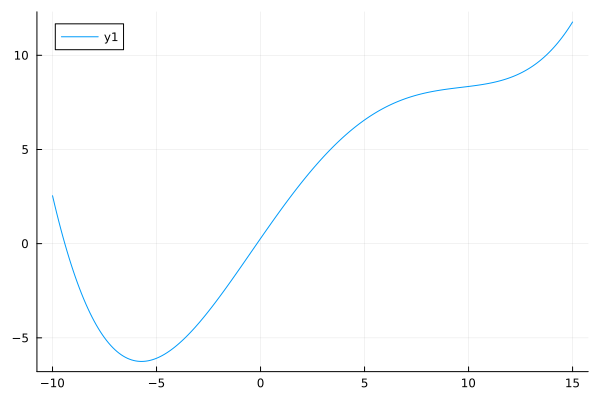

In [35]:
# Plot a range of X inputs to wilks_param_L96_one (-15 to 15)
# b0 = 18 - .275; b1 = -1.59; b2 = 0.019; b3 = 0.013; b4 = -0.000707
using Plots
x_vals = -10:0.1:15
y_vals = [-wilks_param_L96_one(x, uki_thetas) + 18 for x in x_vals]
plot(x_vals, y_vals)

In [39]:
# Test running a full two level output through the one level moments functions
theta_names  = ["h" "F" "c" "b"]

theta_true = [1.0, 10.0, log(10), 10.0]

# L96 run without noise for reference
noise_mag = 0.0

# Initial conditions are stored here
l96_params = L96_two_params(noise=noise_mag, t_end=t_end, toss=toss, timestep=timestep)

# Don't transform observations yet because we will need them as IC's 
moments_func = L96_one_no_moments

# These transforms only the "c" parameter via an absolute value. 
# So the L96 model always recieves abs(c)
transform_func_to_UKI = L96_trans_C2_to_UKI
transform_func_to_L96 = L96_trans_C2_to_L96

# This doesn't do anything in this case
# Could be important with a different transform or theta_true
trans_theta_true = transform_func_to_UKI(theta_true)

# This prepends K and J (defining the dimensionality of the L96 system)
# Default values are K=36, J=10 
KJ_theta_true = vcat([l96_params.K, l96_params.J], trans_theta_true)

model_output = L96_model_full_output(KJ_theta_true, moments_func, transform_func_to_L96, l96_params);

In [49]:
obs_noise = .0
# moments_func = L96_one_moments
moments_func = L96_one_moments_mean
# moments_func = L96_obs_func_a_mean
noisy_y, _ = moments_func(nothing, obs_noise, l96_params, y_matr=model_output)

14×1 Matrix{Float64}:
  2.5831389213980924
  2.6309156275181054
  2.5862553356399776
  2.5177218619453456
 24.335919042937565
 24.273679664251603
 23.814091140571833
 23.95136594063693
  7.70776354705678
  0.8181420369244744
  5.156186703043409
  7.9312421973864655
  0.5436273132898427
  8.011701177258615

In [40]:
model_output

396×10001 Matrix{Float64}:
 -1.56577      -0.439286   …  -5.06796    -4.79677    -1.64389
 -0.00767538    0.837041       4.39773     2.84523    -0.358943
 -0.00849772    0.934553       5.0438      8.94466     9.94959
 -1.79465      -0.639017       3.36043     5.01077     7.61867
  0.618651      1.48777        5.49061     5.01158     1.33496
  0.148981      1.17402    …   6.36129     3.97615     2.53338
 -0.814385      0.132995      -1.62337    -0.578411    0.987286
 -0.761067      0.250172       5.4761      5.25956     5.77566
  0.640703      1.52888        9.79601    12.2476     10.1857
 -0.802376      0.178947       6.51492     0.0772132  -5.13155
  ⋮                        ⋱                           ⋮
  0.000174102  -0.012875       0.352017   -0.288768    0.0996634
  6.30582e-5   -0.0129686      0.560998   -0.0199636  -0.197182
  9.84325e-5   -0.0129387     -0.100996    0.679953    0.51924
  5.05292e-5   -0.0129791  …   0.514782    0.251701   -0.169388
  4.96038e-5   -0.0129785    

In [ ]:
# Test batch_lorenz_96_one_model_part_1 and 2!
function l96_one_ergodic_test(t_end, timestep, sigma_eta_mag, C_0_mag, uki_iters; prior_theta = [0.1, 5, 2, 7], obs_noise = .01, toss=0, plot_progress=false, data_filename=nothing, plot_filename=nothing, loss_plot_filename=nothing, show_plot=true)
    # L96 parameters
    println("t_end = $(t_end), timestep = $(timestep), sigma_eta_mag = $(sigma_eta_mag), C_0_mag = $(C_0_mag), noise = $(obs_noise), toss = $(toss)")

    theta_names  = ["b0" "b1" "b2" "b3" "b4"]

    b0 = 18 - .275; b1 = -1.59; b2 = 0.019; b3 = 0.013; b4 = -0.000707
    theta_true = [b0, b1, b2, b3, b4]

    # L96 run without noise for reference
    noise_mag = 0.0

    # Initial conditions are stored here
    l96_params = L96_one_params(noise=noise_mag, t_end=t_end, toss=toss, timestep=timestep)

    # Don't transform observations yet because we will need them as IC's 
    moments_func = L96_one_no_moments

    # TODO FROM HERE!

    # These transforms only the "c" parameter via an absolute value. 
    # So the L96 model always recieves abs(c)
    transform_func_to_UKI = L96_trans_C2_to_UKI
    transform_func_to_L96 = L96_trans_C2_to_L96

    # This doesn't do anything in this case
    # Could be important with a different transform or theta_true
    trans_theta_true = transform_func_to_UKI(theta_true)

    # This prepends K and J (defining the dimensionality of the L96 system)
    # Default values are K=36, J=10 
    KJ_theta_true = vcat([l96_params.K, l96_params.J], trans_theta_true)

    model_output = L96_model_full_output(KJ_theta_true, moments_func, transform_func_to_L96, l96_params);

    # Tranform observations 
    # (1/K)Sum_over_k(X_k, y_mean_k, x_k^2, X_k*y_mean_k, y^2_mean_k)
    moments_func = L96_obs_func_a_mean
    noisy_y, _ = moments_func(nothing, obs_noise, l96_params, y_matr=model_output)

    #     println("noisy_y")
    #     display(noisy_y)
    
    # This basically creates a dummy first observation that won't get used
    noisy_y = hcat(noisy_y, noisy_y)

    l96_params.initial_conditions = model_output[:, 1]
    l96_params.noise = obs_noise

    Sigma_eta = diagm(noisy_y[:,1]) .* sigma_eta_mag
    

    
    batch_size = 1

    model_func_1 = batch_lorenz_96_model_part_1!
    model_func_2 = batch_lorenz_96_model_part_2

    gamma = 1

    m_0 = transform_func_to_UKI(prior_theta)

    C_0 = diagm(transform_func_to_UKI([1, 10, .1 ,1] * C_0_mag))

    uki_params = UKI_params(noisy_y, Sigma_eta, m_0, C_0, 
        gamma, uki_iters, model_func_1, model_func_2, l96_params, 
        moments_func, theta_uki_to_theta, batch_size=batch_size, param_save_filepath = data_filename)
    
    title = "Ergodic L96 Calibration\n" * 
            "T=" * string(l96_params.t_end) * L", O(\textrm{Noise}) = " * string(@sprintf("%.2e", obs_noise)) * L", " *
            L"O(\sigma_\eta) = " * string(@sprintf("%.2e", sigma_eta_mag)) * L", " *
            L"O(C_0) = " * string(@sprintf("%.2e", C_0_mag))

    try
        for i in 1:uki_params.max_iter
            
            if i%10 == 0 && plot_progress
                println(i)
                plot_iterations(uki_params, theta_true, theta_names, theta_uki_to_theta, with_ribbon=true, title_str=title)
            end

            uki_iteration_part1!(uki_params)
            fail_bool = uki_iteration_part2!(uki_params)
            if fail_bool
                println("UKI failed at iteration $(i)")
                break
            end
        end   
    catch error
        display(error)
    end

    # Convert t_end, timestep, noise, sigma_eta_mag and C_0_mag to string with scientific notation
    # parameter_string = @sprintf("%.0e", t_end) * "_" * @sprintf("%.0e", timestep) * "_" * @sprintf("%.0e", obs_noise) * "_" * @sprintf("%.0e", sigma_eta_mag) * "_" * @sprintf("%.0e", C_0_mag)
    if show_plot
        plot_iterations(uki_params, theta_true, theta_names, theta_uki_to_theta, with_ribbon=false, title_str=title)
    end
    if !isnothing(plot_filename)
        plot_iterations(uki_params, theta_true, theta_names, theta_uki_to_theta, with_ribbon=false, title_str=title, filename=plot_filename)
    end

    # plot_loss_iterations(uki_params, log=true, title_str=title)
    # if !isnothing(loss_plot_filename)
    #     plot_loss_iterations(uki_params, log=true, title_str=title, filename=loss_plot_filename)
    # end


    stability_thresholds = [0.01, 0.015, 0.03]
    stable_iters = zeros(length(stability_thresholds))
    costs = zeros(length(stability_thresholds))
    costs .= -1
    for i in 1:length(stability_thresholds)
        stable_iters[i] = stability_test(stability_thresholds[i], theta_true, uki_params)
        println("For threshold $(stability_thresholds[i]), stable iteration: $(stable_iters[i])")
        if stable_iters[i] > 1
            costs[i] = cost_UKI(t_end, stable_iters[i], batch_size=1, param_count=length(theta_true), parallel=false)
            println("Cost: $(costs[i])")
        end
    end

    true_theta_reached = true_theta_test(0.03, theta_true, uki_params)
    if true_theta_reached
        println("True theta reached")
    else
        println("True theta not reached")
    end

    println("**************************************************")

    return uki_params, stable_iters, costs, true_theta_reached
end